In [1]:
import pandas as pd
from autoshap.autoshap_models import FullPipeline

In [2]:
data_pdf = pd.read_csv('../data/example_dataset.csv')

In [3]:
data_pdf.head()

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,target,dt
0,2.455507,0.515776,-2.496439,-0.128132,-1.040917,0.701222,1.095685,-0.309998,-0.113416,1,2019-08-08
1,1.527586,0.760085,-0.503598,-0.736635,1.079328,-1.346749,-0.411951,-1.234806,0.330508,0,2019-08-08
2,0.160180,0.978178,-0.777022,-0.264811,-0.755381,1.890936,-1.460008,0.807505,2.174213,1,2019-08-08
3,-2.434091,1.235270,0.543380,0.105468,-0.341755,0.652134,-0.858236,0.951028,1.325498,0,2019-08-08
4,2.477754,3.325458,-2.827196,1.597335,-3.051454,-1.509864,-0.269693,1.232371,0.811001,1,2019-08-08


In [4]:
data_pdf.shape

(5000, 11)

In [5]:
ml_model_params = {
                "binary_output_feature":'target',
                "dt_begin":'2019-08-08',
                "dt_end":'2019-09-08',
                "train_samples":5000,
                "shap_calculate_samples":5000,
                "interaction":True,
                "tuning_params":{"learning_rate":[0.01,0.05,0.1],
                            "max_depth":[6,9,12],
                            "min_child_weight":[1,3,5]
                              },
                "path_to_data":"../data",
                "verbose":1
                  }

In [6]:
pipeline = FullPipeline(ml_model_params)

In [7]:
%%time
pipeline.run_full_pipeline(data_pdf)

Chosen n_samples (5000) for dataset has insufficient counts for one of the classes.
n_samples will be set as 3302
shap_calculate_samples is less than train_samples.
Setting shap_calculate_samples = 3302
CPU times: user 1min 52s, sys: 296 ms, total: 1min 52s
Wall time: 10.4 s


* Check log

In [8]:
!cat ../data/train_log_*

########################################
log from 2020-02-03
trained with          : <class 'xgboost.core.Booster'>
parameters            : {'max_depth': 12, 'min_child_weight': 1, 'learning_rate': 0.1}
train_samples         : 3302
shap_calculate_samples: 5000
data date             : 2019-08-08
classification report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1595
         1.0       1.00      0.96      0.98      1707

    accuracy                           0.98      3302
   macro avg       0.98      0.98      0.98      3302
weighted avg       0.98      0.98      0.98      3302




Loading data...
Building dataframes...
Making summary plots...


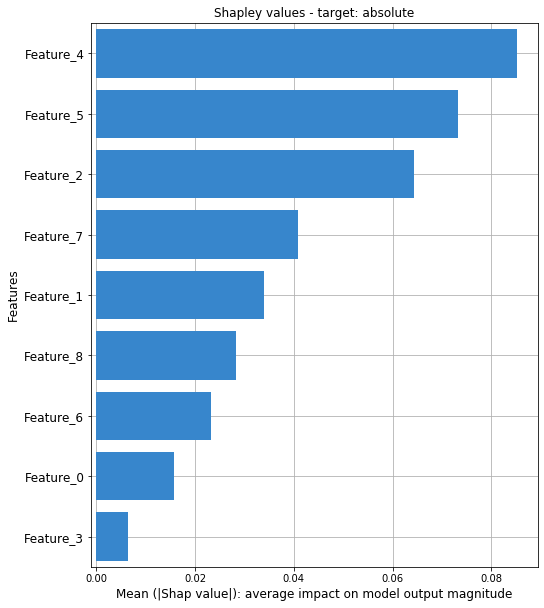

<Figure size 432x288 with 0 Axes>

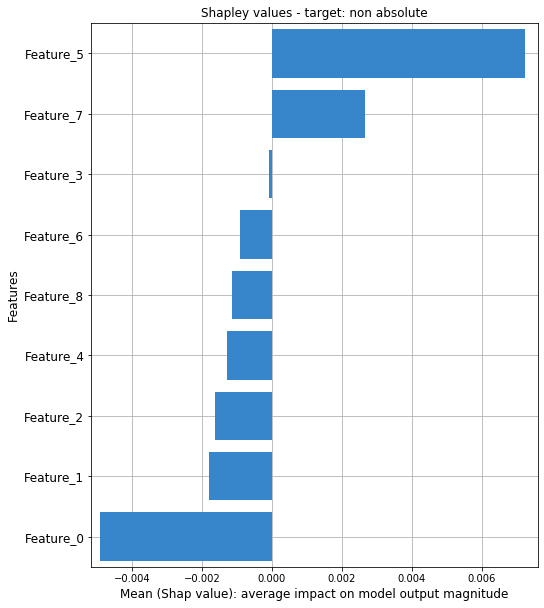

<Figure size 432x288 with 0 Axes>

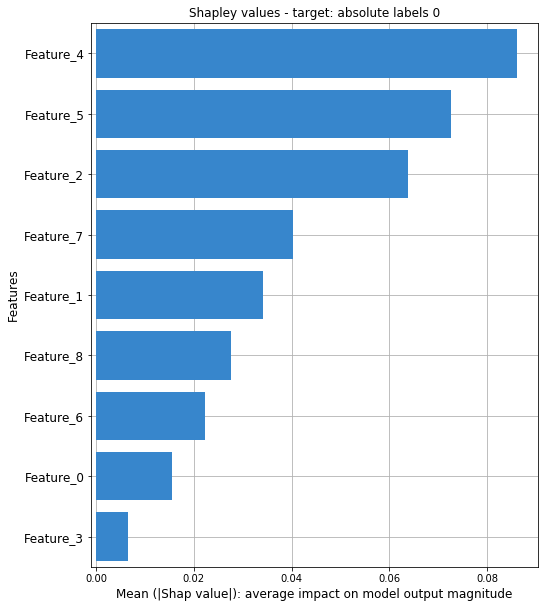

<Figure size 432x288 with 0 Axes>

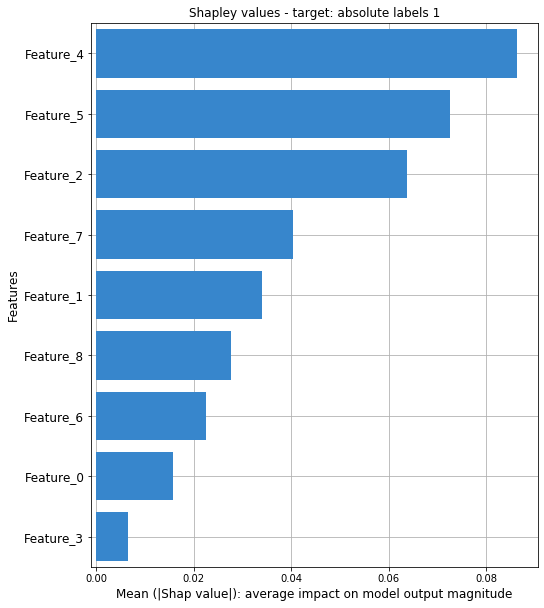

<Figure size 432x288 with 0 Axes>

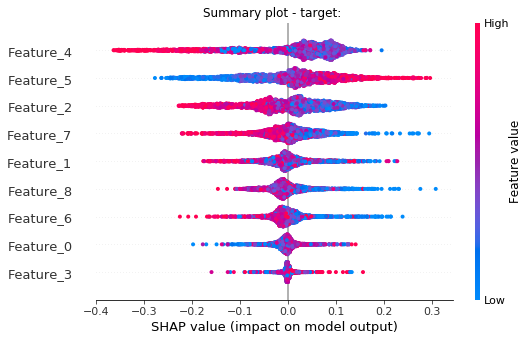

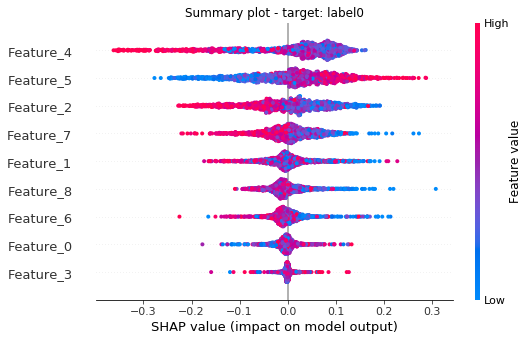

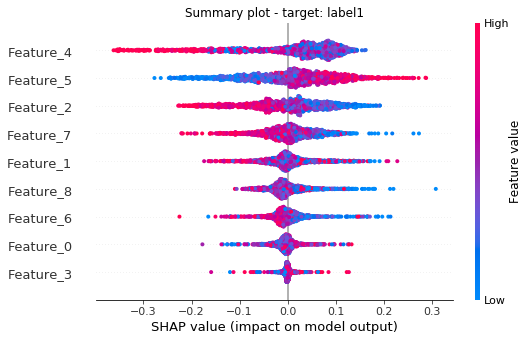

Making dependence plots...


<Figure size 432x288 with 0 Axes>

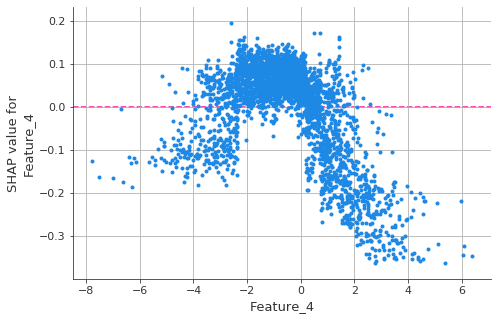

<Figure size 432x288 with 0 Axes>

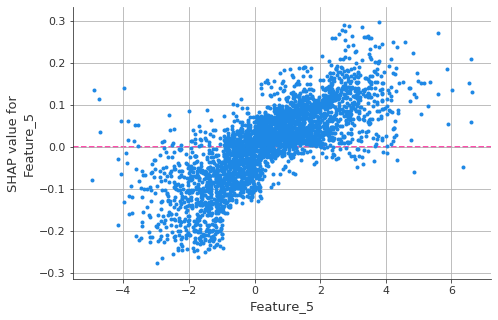

<Figure size 432x288 with 0 Axes>

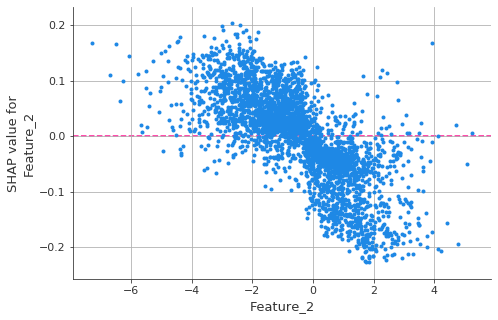

<Figure size 432x288 with 0 Axes>

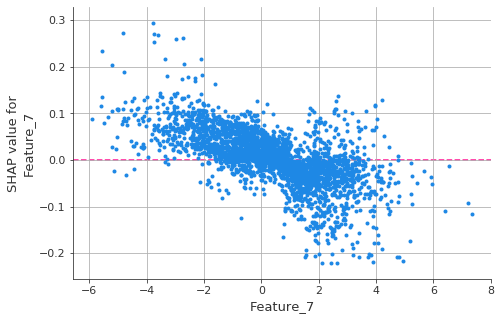

<Figure size 432x288 with 0 Axes>

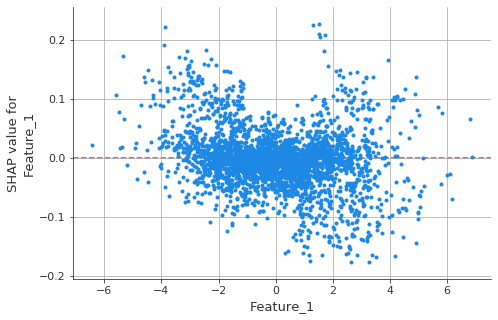

<Figure size 432x288 with 0 Axes>

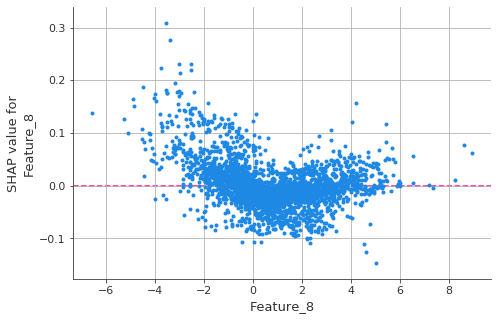

<Figure size 432x288 with 0 Axes>

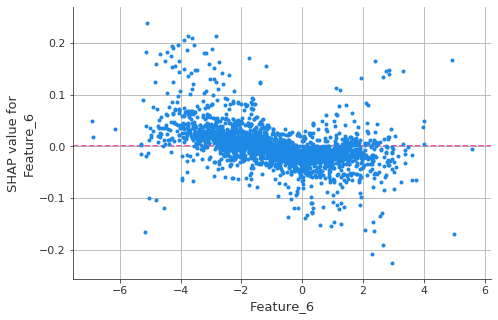

Making dependence interaction plots...


<Figure size 432x288 with 0 Axes>

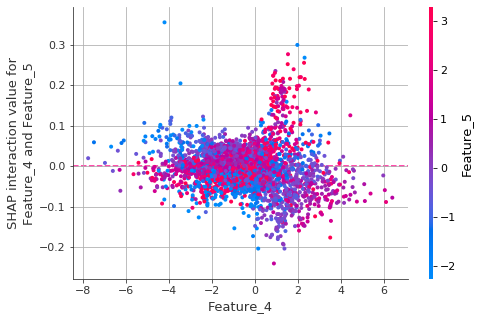

<Figure size 432x288 with 0 Axes>

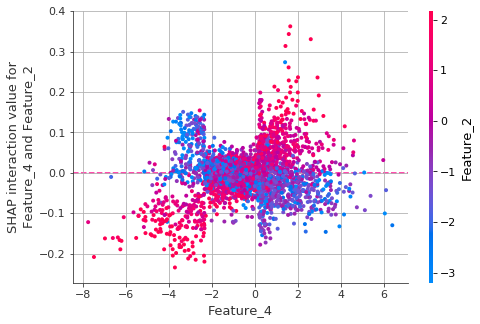

<Figure size 432x288 with 0 Axes>

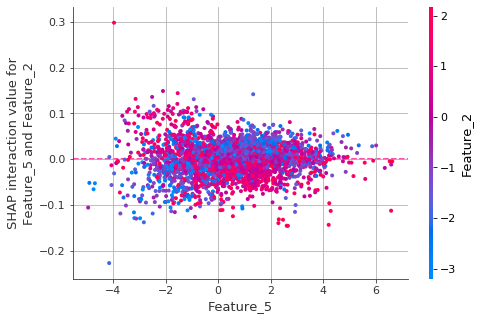

We are done!


In [8]:
pipeline.make_summary(n_high_contribution_cols = 7, n_high_contribution_interaction_cols = 3,show_plots=True,max_display=9)